### IMPORT

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

### SETUP

In [3]:
df = pd.read_csv('data/raw/nvidia/NVDA.csv')

# Stampa le prime righe per verificare che il file sia stato letto correttamente
print("Prime righe del dataset:")
print(df.head())

# Stampa le colonne disponibili
print("Colonne del dataset:", df.columns)

Prime righe del dataset:
         Date  Adj Close     Close      High       Low      Open      Volume
0  1999-01-22   0.037615  0.041016  0.048828  0.038802  0.043750  2714688000
1  1999-01-25   0.041556  0.045313  0.045833  0.041016  0.044271   510480000
2  1999-01-26   0.038331  0.041797  0.046745  0.041146  0.045833   343200000
3  1999-01-27   0.038212  0.041667  0.042969  0.039583  0.041927   244368000
4  1999-01-28   0.038092  0.041536  0.041927  0.041276  0.041667   227520000
Colonne del dataset: Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [5]:
# 2. Conversione della colonna 'Date' in formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# 3. Impostazione dell'indice temporale
df.set_index('Date', inplace=True)

In [6]:
# --- OUTPUT DI VERIFICA ---
print("ATEPRIMA DATI")
display(df.head())

print("\nINFORMAZIONI SULLA STRUTTURA DEI DATI")
df.info()

print("\nCONTROLLO QUALITA' (valori null)")
print(df.isnull().sum())

print("\nSTATISTICHE DESCRITTIVE")
display(df.describe())

print("\nFREQUENZA DEI DATI")
print(f"Frequenza dei dati: {pd.infer_freq(df.index)}")

ATEPRIMA DATI


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000



INFORMAZIONI SULLA STRUTTURA DEI DATI
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6558 entries, 1999-01-22 to 2025-02-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  6558 non-null   float64
 1   Close      6558 non-null   float64
 2   High       6558 non-null   float64
 3   Low        6558 non-null   float64
 4   Open       6558 non-null   float64
 5   Volume     6558 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 358.6 KB

CONTROLLO QUALITA' (valori null)
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

STATISTICHE DESCRITTIVE


,Adj Close,Close,High,Low,Open,Volume
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03
mean,8.768532,8.795447,8.956567,8.618315,8.795850,5.991103e+08
std,23.907205,23.904882,24.349618,23.419200,23.922708,4.307236e+08
min,0.031286,0.034115,0.035547,0.033333,0.034896,1.968000e+07
25%,0.257739,0.281042,0.288511,0.273354,0.280810,3.384780e+08
50%,0.437176,0.466083,0.472875,0.459250,0.466584,5.002635e+08
75%,4.597059,4.644625,4.724000,4.588750,4.632437,7.307002e+08
max,149.429993,149.429993,153.130005,147.820007,153.029999,9.230856e+09



FREQUENZA DEI DATI
Frequenza dei dati: None


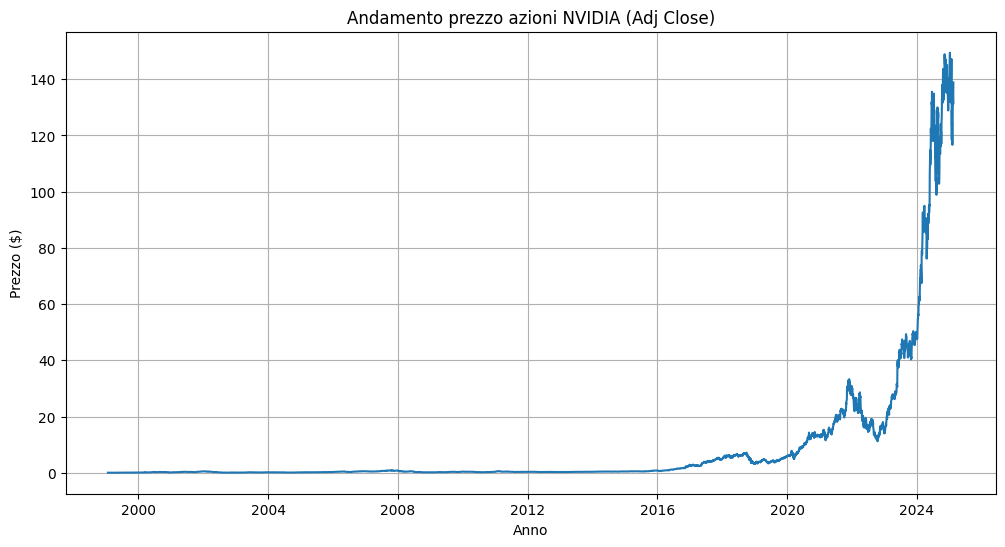

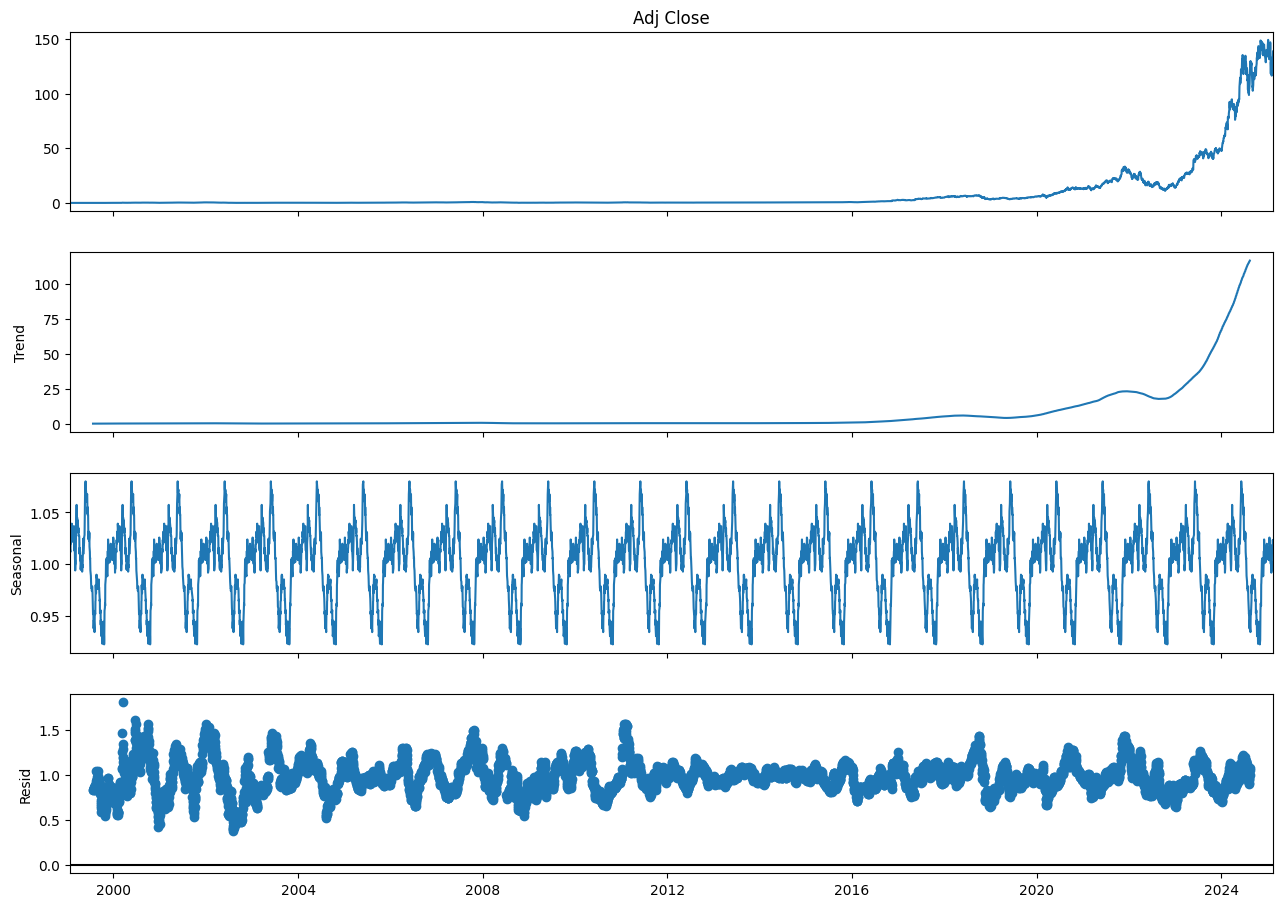

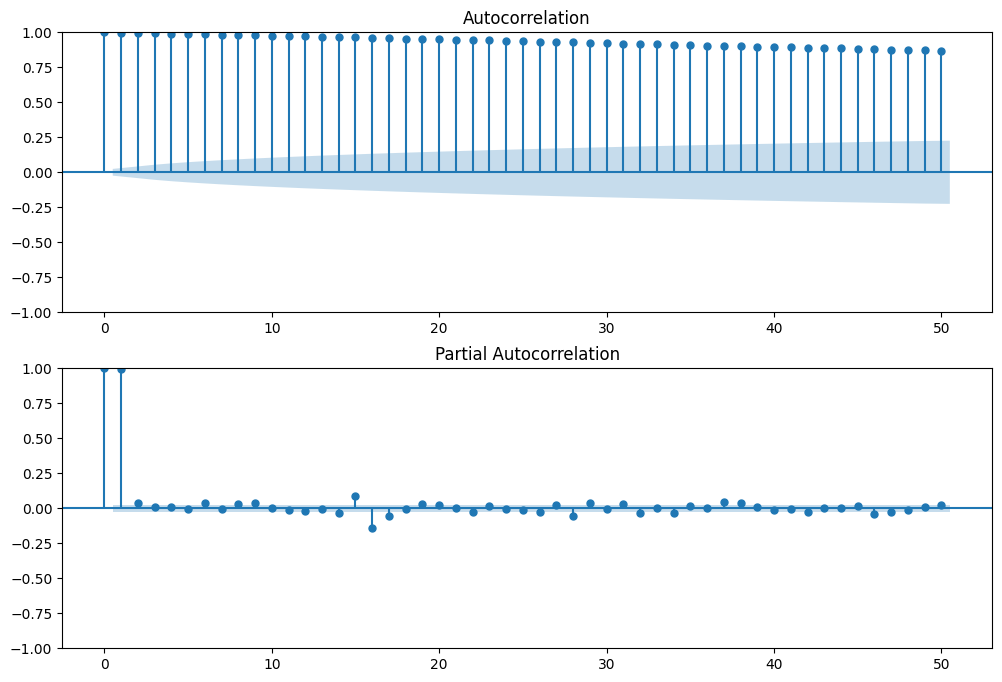

RISULTATI TEST ADF
ADF Statistic: 4.624244228140459
p-value: 1.0
	1%: -3.431353047472829
	5%: -2.861983261289279
	10%: -2.5670059446022853
La serie non è stazionaria (non rifiutiamo l'ipotesi nulla)


In [8]:
# Lavoriamo sulla colonna adj_close (tiene conto di dividendi e stock split)
ts = df['Adj Close']

# Visualizzazione della serie temporale
plt.figure(figsize=(12,6))
plt.plot(ts)
plt.title('Andamento prezzo azioni NVIDIA (Adj Close)')
plt.xlabel('Anno')
plt.ylabel('Prezzo ($)')
plt.grid(True)
plt.show()

# Decomposizione della serie temporale
decomposition = seasonal_decompose(ts, model='multiplicative', period=252)  # 252 giorni di trading in un anno
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

# Automated Correlation Function (ACF) e Partial ACF (PACF)
fig, ax = plt.subplots(2,1, figsize=(12,8))
plot_acf(ts, ax=ax[0], lags=50)
plot_pacf(ts, ax=ax[1], lags=50)
plt.show()

# Test di stazionarietà di Dickey-Fuller
print("RISULTATI TEST ADF")
adf_result = adfuller(ts)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')

# Interpretazione del test ADF
if adf_result[1] <= 0.05:
    print("La serie è stazionaria (rifiutiamo l'ipotesi nulla)")
else:
    print("La serie non è stazionaria (non rifiutiamo l'ipotesi nulla)")

Un p-value di 1.0 indica che la serie è "perfettamente non stazionaria". Non c'è il minimo dubbio statistico: la serie ha un Trend fortissimo e la media cambia drasticamente nel tempo. Se provassimo a fare previsioni su questi dati così come sono, il modello fallirebbe miseramente.

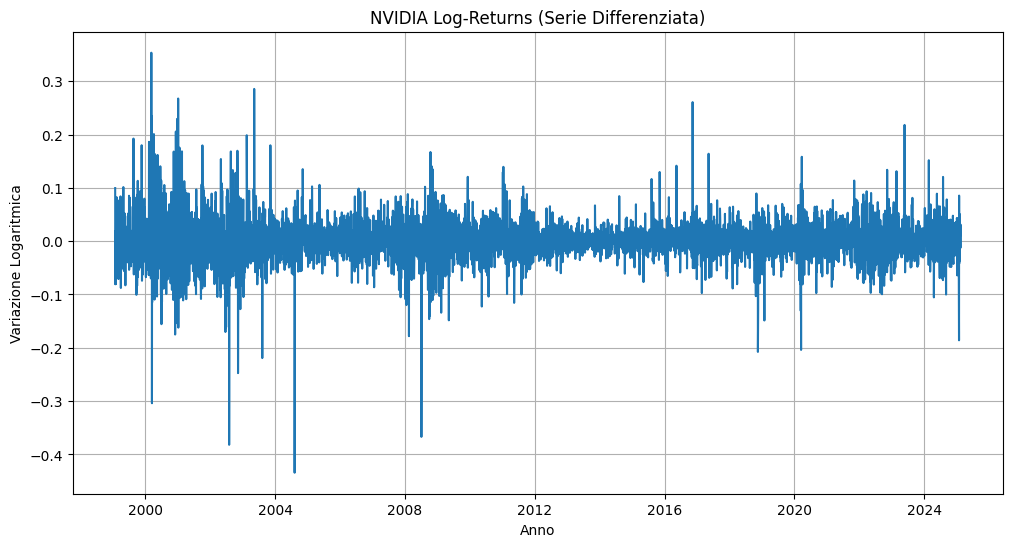


RISULTATI TEST ADF SULLA SERIE DIFFERENZIATA
ADF Statistic: -15.87173646985266
p-value: 8.965383988235893e-29
Critical Values: 
	1%: -3.4313513579179444
	5%: -2.8619825147761264
	10%: -2.567005547217345

CONCLUSIONE: p value < 0.05. La serie è ora stazionaria


In [10]:
# Transformazioni per la stazionarietà
ts_log = np.log(ts)

# Differenziazione
# dropna() è necessario per rimuovere il primo valore NaN generato dalla differenziazione
ts_diff = ts_log.diff().dropna()

# Visualizzazione della serie differenziata
plt.figure(figsize=(12,6))
plt.plot(ts_diff)
plt.title('NVIDIA Log-Returns (Serie Differenziata)')
plt.xlabel('Anno')
plt.ylabel('Variazione Logaritmica')
plt.grid(True)
plt.show()

# Nuovo adf test sulla serie differenziata
print("\nRISULTATI TEST ADF SULLA SERIE DIFFERENZIATA")
result_diff = adfuller(ts_diff)
print(f'ADF Statistic: {result_diff[0]}')
print(f'p-value: {result_diff[1]}')
print('Critical Values: ' )
for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

# verifica 
if result_diff[1] < 0.05:
    print("\nCONCLUSIONE: p value < 0.05. La serie è ora stazionaria")
else:
    print("\nATTENZIONE: la serie non è ancora stazionaria.")

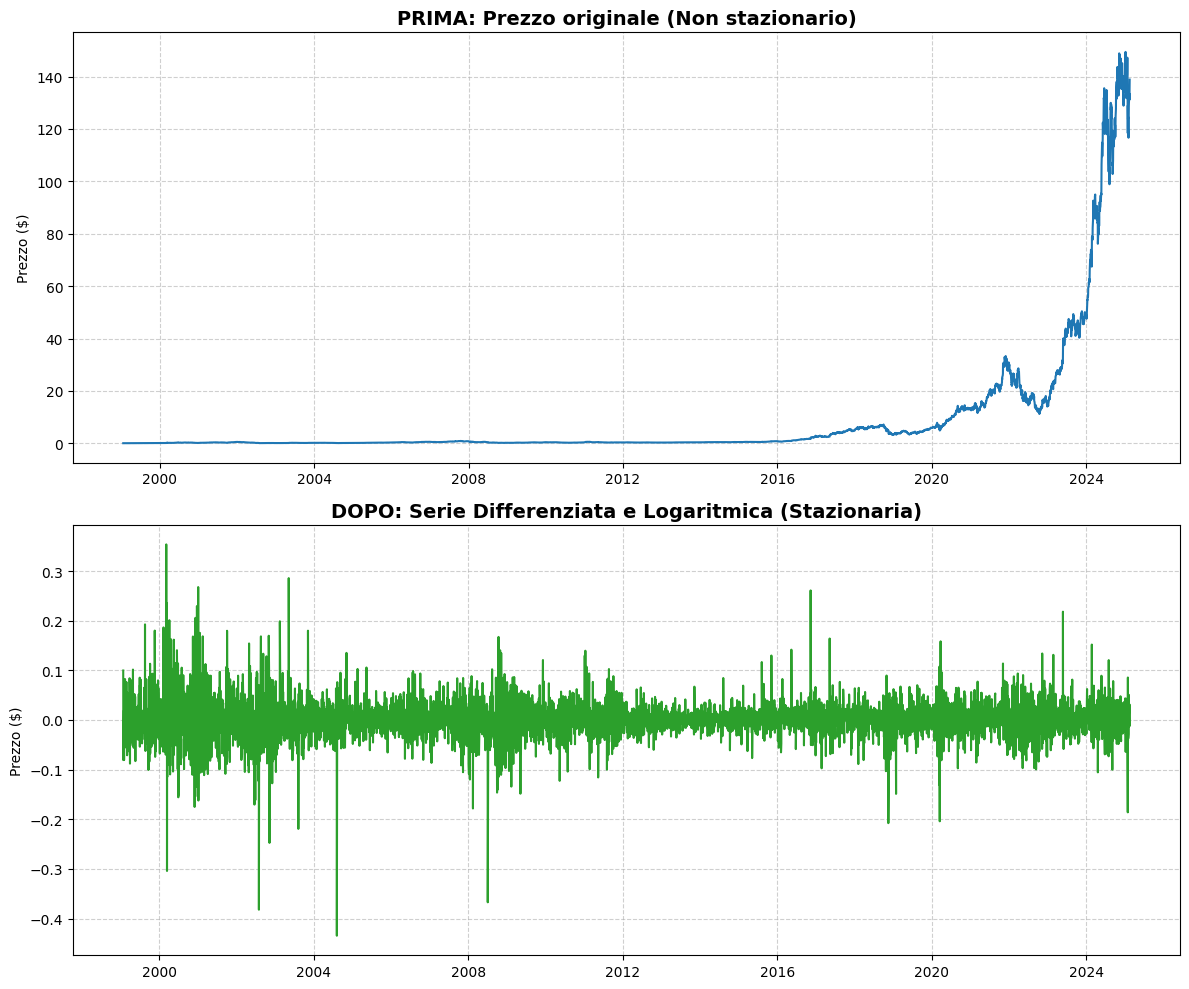

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10))

# GRAFICO 1: DATI ORIGINALI
ax1.plot(ts, color='#1f77b4')
ax1.set_title('PRIMA: Prezzo originale (Non stazionario)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Prezzo ($)')
ax1.grid(True, linestyle="--", alpha=0.6)

# GRAFICO 2: DATI DIFFERENZIATI
ax2.plot(ts_diff, color='#2ca02c')
ax2.set_title('DOPO: Serie Differenziata e Logaritmica (Stazionaria)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Prezzo ($)')
ax2.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()